In [1]:
%%time
#!pip install plotly
#!pip install bubbly
#!pip install plotly_express==0.4.0 

Wall time: 22.6 s


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
#import plotly.express as px

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
%%time
data = pd.read_csv("C:/Users/Khanh/Desktop/GMUeducation/DAEN_690/DATA/synthetic-data-prod.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                                               Non-Null Count    Dtype  
---  ------                                               --------------    -----  
 0   Balance of Savings and Checkings account (I-864)     1000000 non-null  float64
 1   Current cash value of stocks, bonds, etc. (I-864)    1000000 non-null  float64
 2   Annual Income (I-864)                                1000000 non-null  float64
 3   Country of Birth (I-130)                             1000000 non-null  object 
 4   First Petition for Beneficiary (I-130)               1000000 non-null  bool   
 5   Beneficiary Ever in Immigration Proceedings (I-130)  1000000 non-null  bool   
 6   Criminal History (N-400)                             1000000 non-null  bool   
 7   Age                                                  1000000 non-null  int64  
 8   Spouse - Age (I-130)                       

In [5]:
df = data
df = df.rename(columns={"Annual Income (I-864)": "Income", "Known Fradulent": "Known_Fraud", "Country of Birth (I-130)": "Country_of_birth", "Race/Ethnicity (I-130)": "Race_Ethnic", "Religion (I-130)": "Religion", "Language (I-130)": "Language"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                                               Non-Null Count    Dtype  
---  ------                                               --------------    -----  
 0   Balance of Savings and Checkings account (I-864)     1000000 non-null  float64
 1   Current cash value of stocks, bonds, etc. (I-864)    1000000 non-null  float64
 2   Income                                               1000000 non-null  float64
 3   Country_of_birth                                     1000000 non-null  object 
 4   First Petition for Beneficiary (I-130)               1000000 non-null  bool   
 5   Beneficiary Ever in Immigration Proceedings (I-130)  1000000 non-null  bool   
 6   Criminal History (N-400)                             1000000 non-null  bool   
 7   Age                                                  1000000 non-null  int64  
 8   Spouse - Age (I-130)                       

<AxesSubplot:xlabel='Annual Income (I-864)', ylabel='Density'>

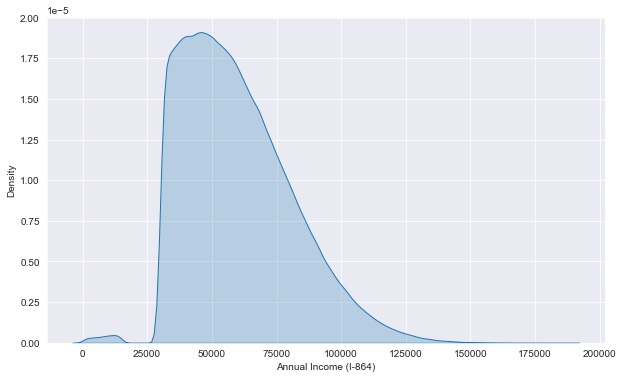

In [6]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.kdeplot(data=data['Annual Income (I-864)'],label="Density for Annual Income" ,shade=True)

Text(0, 0.5, 'Distribution of count')

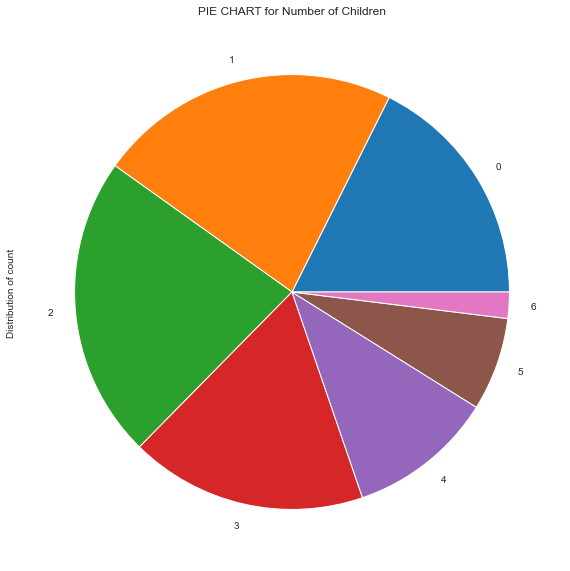

In [7]:
data.groupby(['Children Count (I-130)']).size().plot.pie(figsize=(10,10))
plt.title('PIE CHART for Number of Children')
plt.ylabel('Distribution of count')

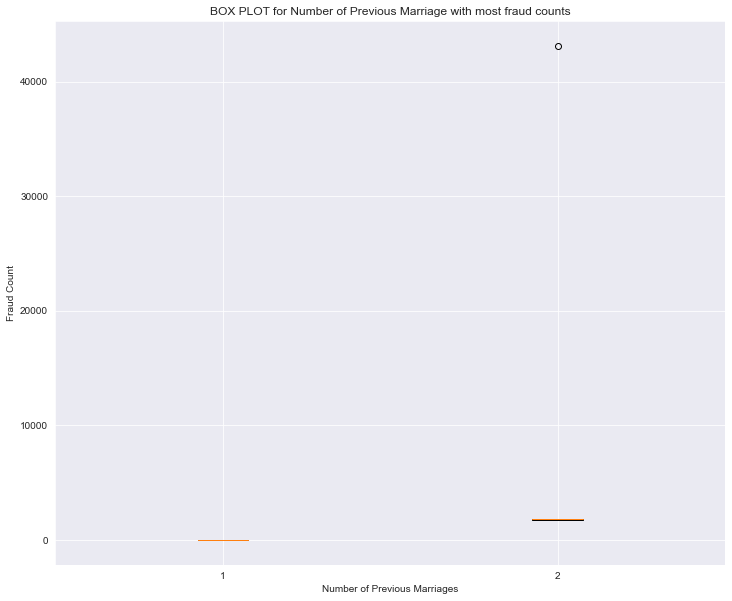

In [8]:
prev_marriage_df = df.loc[df.Known_Fraud==True].groupby(["Number of Previous Marriages (I-130)"])['Known_Fraud'].count().reset_index()
prev_marriage_df = pd.DataFrame(prev_marriage_df)

plt.figure(figsize=(12,10))
box = plt.boxplot(prev_marriage_df, patch_artist=True)
 
colors = ['blue', 'green', 'purple', 'brown', 'yellow']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel("Number of Previous Marriages")
plt.ylabel("Fraud Count")
plt.title("BOX PLOT for Number of Previous Marriage with most fraud counts")
plt.show()

Text(0.5, 1.0, 'BAR CHART for proportion of Fraud base on the number of Children')

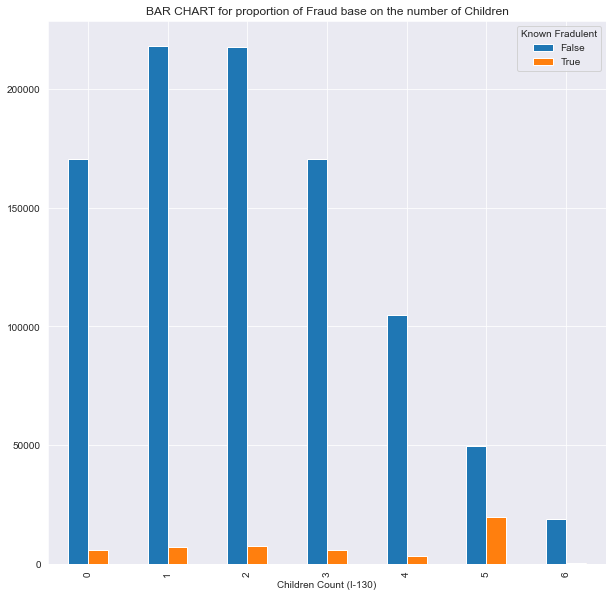

In [9]:
pd.crosstab(data['Children Count (I-130)'],data['Known Fradulent']).plot.bar(figsize=(10,10))
plt.title('BAR CHART for proportion of Fraud base on the number of Children')

Text(0.5, 1.0, 'BAR CHART for proportion of Fraud base on RELIGION')

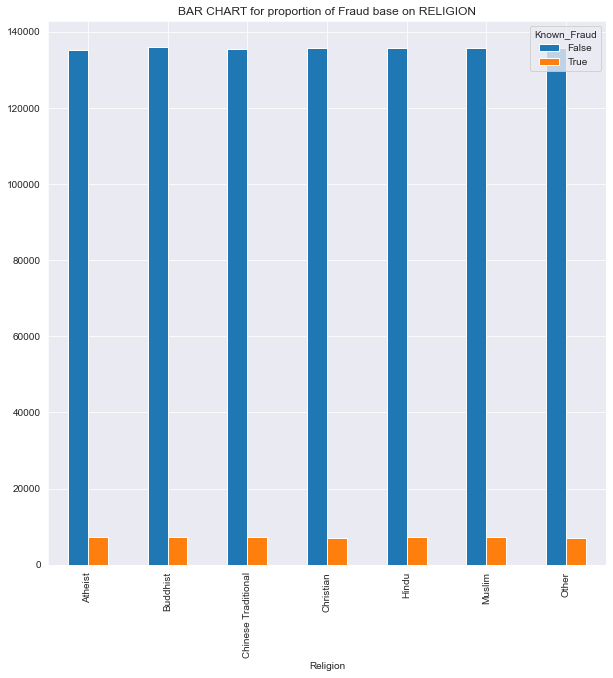

In [10]:
pd.crosstab(df['Religion'],df['Known_Fraud']).plot.bar(figsize=(10,10))
plt.title('BAR CHART for proportion of Fraud base on RELIGION')

Text(0.5, 1.0, 'BAR CHART for proportion of Fraud base on LANGUAGE')

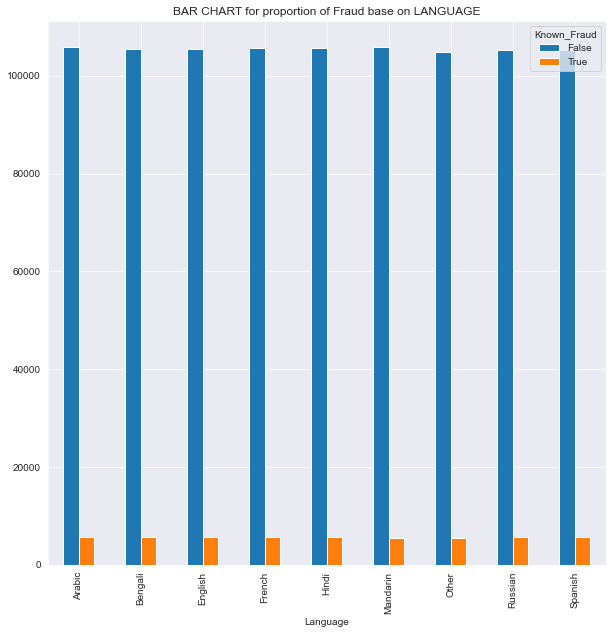

In [11]:
pd.crosstab(df['Language'],df['Known_Fraud']).plot.bar(figsize=(10,10))
plt.title('BAR CHART for proportion of Fraud base on LANGUAGE')

<AxesSubplot:xlabel='Number of Previous Marriages (I-130)'>

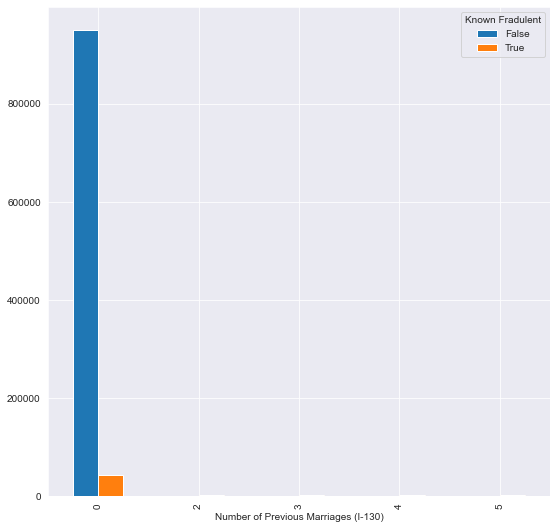

In [12]:
pd.crosstab(data['Number of Previous Marriages (I-130)'],data['Known Fradulent']).plot.bar(figsize=(9,9))

In [13]:
df2=df.loc[df.Known_Fraud==True].groupby(['Country_of_birth'])['Known_Fraud'].count().reset_index()
#df2['count'] = df2.groupby(['Country_of_birth']).transform('count')
df3 = pd.DataFrame(df2)
df3['Count'] = df3['Known_Fraud']
sorted_df = df3.sort_values(by='Known_Fraud', ascending=False)
print("Get the top 20 countries with the most marriage frauds")
sorted_df.head(20)


Get the top 20 countries with the most marriage frauds


,Country_of_birth,Known_Fraud,Count
171,Philippines,1951,1951
240,Yemen,1950,1950
146,Morocco,1950,1950
164,Pakistan,1945,1945
112,Kenya,1942,1942
139,Mexico,1941,1941
80,Ghana,1919,1919
158,Nigeria,1918,1918
44,China,1878,1878
99,India,1863,1863


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


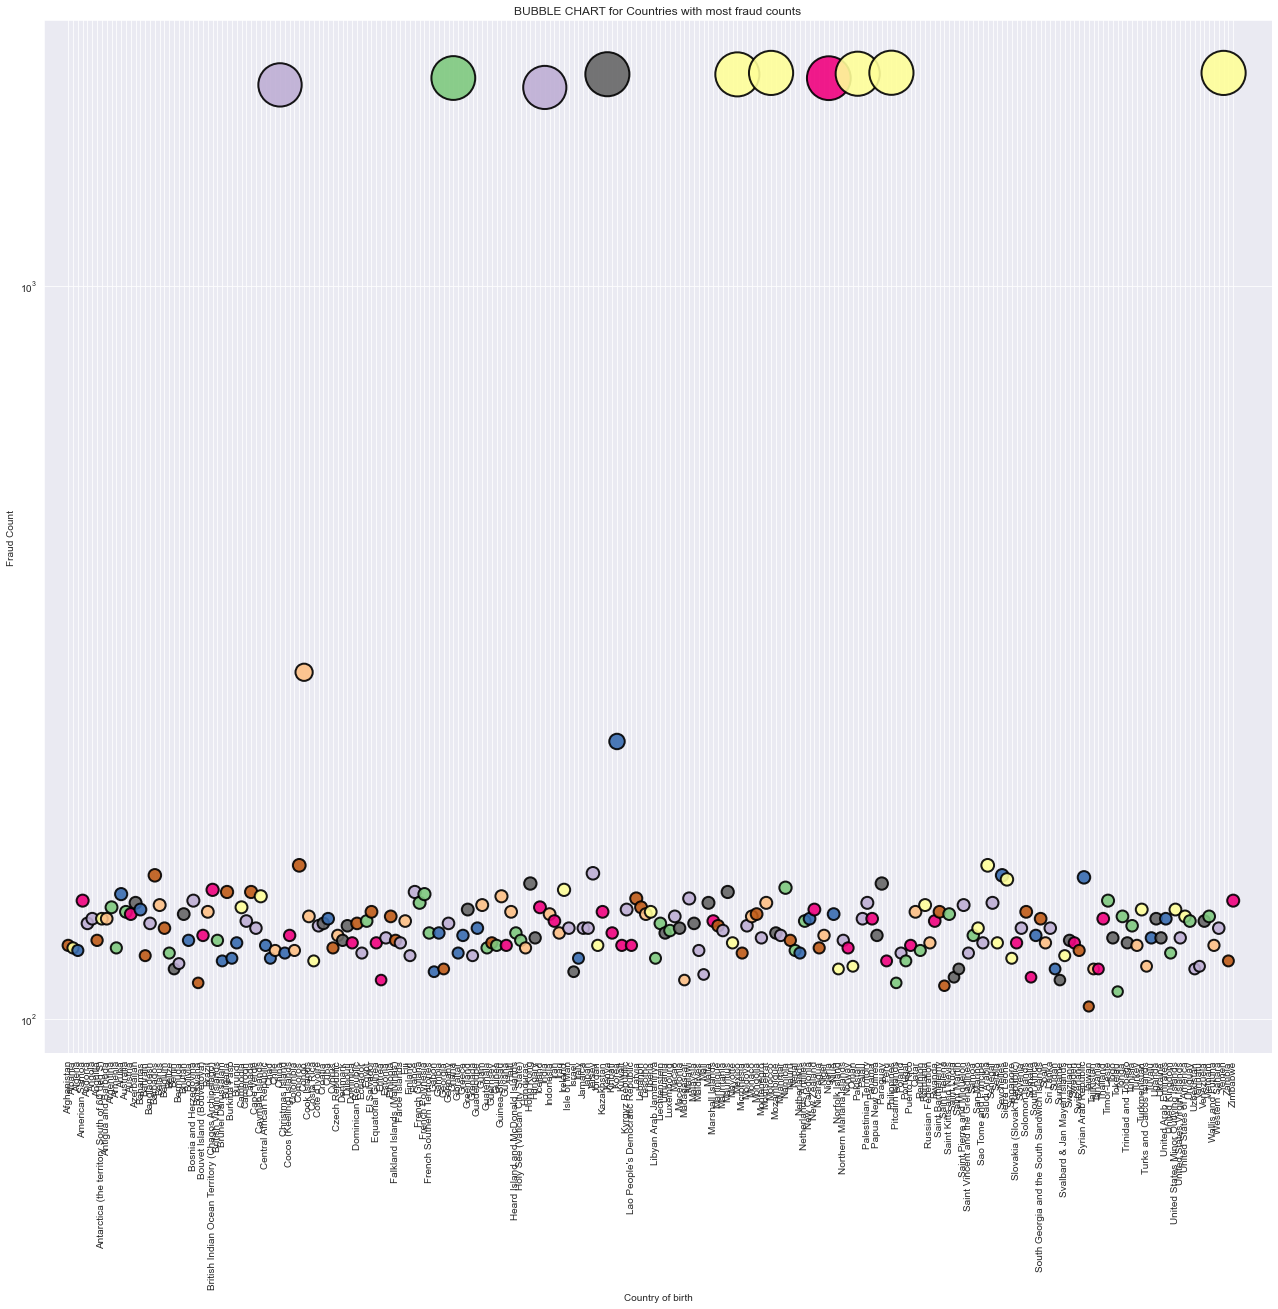

In [21]:
df3['Country_of_birth']=pd.Categorical(df3['Country_of_birth'])

colors_list=np.random.rand(243)
#plt.scatter(x,y,s=sizes*500,c=colors_list)
# Set the figure size
plt.figure(figsize=(22, 19))


# Scatterplot
ax = plt.scatter(
    x = df3['Country_of_birth'], 
    y = df3['Count'], 
    s= df3['Known_Fraud'], 
    #c=df3['Country_of_birth'].cat.codes,
    c = colors_list,
    cmap="Accent", 
    alpha=0.9, 
    edgecolors="black", 
    linewidth=2);

# Add titles (main and on axis)

plt.yscale('log')
plt.xlabel("Country of birth")
plt.ylabel("Fraud Count")
plt.title("BUBBLE CHART for Countries with most fraud counts")
plt.ylim(0,2300)
plt.xlim(-5, 250)
plt.xticks(rotation=90)

plt.show()
